Let's see how the data look like.


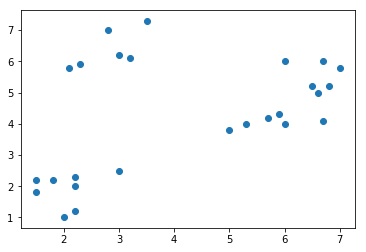

We can see 3 or 4 groups of points, right?

We will model this data with 4 densities (L=4).

Initialization done.
Initial density:
Mean: [4.134615384615384, 4.273076923076923]
Variance: [3.9630325443786987, 3.3327366863905326]


In [1]:
# =================================================
# Your names:





# =================================================
# Automatic Speech Recognition WS-17-18
# Exercise 7, Task 7.2

# Please make use of the functions and the variables
# provided in this notebook when you write your answer codes.
import matplotlib.pyplot as plt
import numpy as np

def Read(filename):
    x_data = []
    y_data = []
    # Read function:
    #   Reads the 2D data from the file path
    #   Returns a list for each component of the data.
    with open(filename) as f:
        data_str = f.readlines()
        for i in range(0, len(data_str)):
            data_point = data_str[i].split()
            x_data.append(float(data_point[0]))
            y_data.append(float(data_point[1]))
        return x_data, y_data

# This is another helper code cell which introduces
# the name of variables to be used in your solution
# as well as the data you will use.
# The task starts at the next cell.

# Download the data from L2P and put the path here:
data = "./observations_ex7.data"
data_x, data_y = Read(data)

# Visualize the data
print("Let's see how the data look like.")
plt.scatter(data_x, data_y)
plt.show()

print("We can see 3 or 4 groups of points, right?\n")
print("We will model this data with 4 densities (L=4).\n")

# Set the hyperparameters given in the text:
L = 4  # Maximum number of densities
R = 10  # Number of iterations
eps_u = [0.1, 0.1]  # Vector: epsilon * u

# Number of data points:
N = len(data_x)

# Compute the initial mean
init_mean = [0.,0.]
for i in range(0,N):
    init_mean[0] += float(data_x[i])
    init_mean[1] += float(data_y[i])
init_mean[0] *= 1./float(N)
init_mean[1] *= 1./float(N)

# Compute the initial variance
init_var = [0., 0.]
for i in range(0,N):
    init_var[0] += (data_x[i]-init_mean[0])*(data_x[i]-init_mean[0])
    init_var[1] += (data_y[i]-init_mean[1])*(data_y[i]-init_mean[1])
init_var[0] *= 1./float(N)
init_var[1] *= 1./float(N)

def Init():
    # Add the initial density to the list.
    global Mean
    Mean = []  # Mean is a list in which Mean[l] stores the mean vector for the density l.
    Mean.append(init_mean)
    
    global Var
    Var = init_var  # Pooled variance.
    
    global p_l
    p_l = []  # Array to store p(l) (cf. the notation given in the sheet).
    p_l.append(1)

    global N_l  # Array to store N_l (cf. the notation given in the sheet).
    N_l = np.zeros([L])  
    N_l = list(N_l)
    N_l[0] = N
    
    global A  # Array to store the membership of each point.
    A = np.zeros([N], dtype=np.int32)
    A = list(A)
    print('Initialization done.')

Init()
print('Initial density:')
print('Mean:', Mean[0])
print('Variance:', Var)

In [2]:
#   Functions for (a)
def Gaussian(x, mean, var):
    # Returns p(x|l) (cf. the notation given in the sheet)
    # You can use for example np.exp for the exponential
    # For the number 'pi', you can e.g. use 'np.pi'
    # TODO You code here
    result = 0
    for x_e,mean_e,var_e in zip(x,mean,var):
        result += -1.0/2.0 * (x_e-mean_e)**2/var_e
    result = np.exp(result)
    for var_e in var:
        result /= np.sqrt(2*np.pi*var_e**2)
        
    return result

def Assign(K):
    # Update the membership of each points
    # (list A introduced in the previous cell)
    # K: current number of densities
    # TODO You code here
    pp_func = lambda n,l: p_l[l]*Gaussian([data_x[n],data_y[n]],Mean[l],Var)
    for n in range(N):
        A[n] = max(range(K),key = lambda l:pp_func(n,l))
    return 0

# Function for (c)
def EstimateParameters(K):
    # Re-estimate the means and variances for all densities
    # K: current number of densities
    # TODO You code here
    Var = [0,0]
    for i in range(K):
        N_l[i] = A.count(i)
        p_l[i] = N_l[i]/N #correct in py3 (floating point division)
        Mean[i] = [0,0]
        
        if N_l[i] == 0:
            continue
        
        for n,(x,y) in enumerate(zip(data_x,data_y)):
            Mean[i][0] += 1/N_l[i] * (A[n] == i)*x
            Mean[i][1] += 1/N_l[i] * (A[n] == i)*y
        for n,(x,y) in enumerate(zip(data_x,data_y)):
            Var[0] += 1/N * (x-Mean[i][0])**2
            Var[1] += 1/N * (y-Mean[i][1])**2
    return 0

# Functions for (d)
def FindMinLogLike(K):
    # Return the index of the density with the lowest likelihood.
    # TODO You code here
    LL = [0 for _ in range(K)]
    for n,data in enumerate(zip(data_x,data_y)):
        index = A[n]
        if p_l[index]*Gaussian(data,Mean[index],Var) == 0:
            return index
        if Gaussian(data,Mean[index],Var) < 0:
            print("Debug:"+ str(Gaussian(data,Mean[index],Var)))
        LL[index] += np.log( p_l[index] * Gaussian(data,Mean[index],Var) )
    
    l_min = min(range(K), key = lambda i: LL[i])
    
    return l_min

def SplitDensity(l):
    # Split the density l.
    # If needed: When you have a list L, you can use L.pop(n) to remove the
    # element in position n of the list L.
    # TODO You code here
    eps_u = 0.1
    
    Mean.append([Mean[l][0] + eps_u, Mean[l][1] + eps_u])
    Mean.append([Mean[l][0] - eps_u, Mean[l][1] - eps_u])
    p_l.append(p_l[l])
    p_l.append(p_l[l])
    
    Mean.pop(l)
    p_l.pop(l)
    
    return 0

In [22]:
Init()
# Apply the algorithm to the data.
# Report the mean, variance and membership for each split iteration.

split = []

K = 1
while True:
    for _ in range (R):
        Assign(K)
        EstimateParameters(K)
    
    print("K:" + str(K))
    print("Mean:" + str(Mean))
    print("Var:" + str(Var))
    print("Membership:" + str(A))
    
    split.append(A[:])
    
    if K >= L:
        break;
    
    l_min = FindMinLogLike(K)
    SplitDensity(l_min)
    K += 1
        
    assert (K == len(p_l))

# TODO You code here


# Checkpoint: after the first split, you should get the following:
# Mean: [[5.06, 5.33], [2.05, 1.90]]
# Var: [3.96, 3.33]
# Membership: [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Initialization done.
K:1
Mean:[[4.134615384615385, 4.273076923076923]]
Var:[3.9630325443786987, 3.3327366863905326]
Membership:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
K:2
Mean:[[5.061111111111112, 5.3277777777777775], [2.05, 1.9]]
Var:[3.9630325443786987, 3.3327366863905326]
Membership:[1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
K:3
Mean:[[2.05, 1.9], [6.183333333333333, 4.8], [2.8166666666666664, 6.383333333333333]]
Var:[3.9630325443786987, 3.3327366863905326]
Membership:[0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
K:4
Mean:[[2.05, 1.9], [2.8166666666666664, 6.383333333333333], [6.599999999999998, 5.533333333333333], [5.7666666666666675, 4.066666666666666]]
Var:[3.9630325443786987, 3.3327366863905326]
Membership:[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2]


In [23]:
# Visualization of the split you obtained

# This cell is a helper to show you an example method to plot
# data points with different colors.

split_example = [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Colors = ['b', 'r', 'y', 'm']  # blue, red, yellow, magenta. No need to modify this list.

color = [Colors[split_example[i]] for i in range(0, N)]  # List of the color for each data point.
plt.scatter(data_x, data_y, c=color)  # 'c' argument to provide the color for each point as a list.
plt.show()

# You will use the next cells below to plot your own results.

In [24]:
# Plot for the last question
# Split 0
print("Split 0")

Colors = ['b', 'r', 'y', 'm']  # blue, red, yellow, magenta. No need to modify this list.

color = [Colors[split[0][i]] for i in range(0, N)]  # List of the color for each data point.
plt.scatter(data_x, data_y, c=color)  # 'c' argument to provide the color for each point as a list.
plt.show()

# TODO You code here

Split 0


Split 1


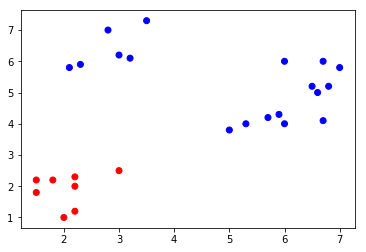

In [25]:
# Plot for the last question
# Split 1
print("Split 1")

Colors = ['b', 'r', 'y', 'm']  # blue, red, yellow, magenta. No need to modify this list.

color = [Colors[split[1][i]] for i in range(0, N)]  # List of the color for each data point.
plt.scatter(data_x, data_y, c=color)  # 'c' argument to provide the color for each point as a list.
plt.show()
# TODO You code here

In [26]:
# Plot for the last question
# Split 2
print("Split 2")

Colors = ['b', 'r', 'y', 'm']  # blue, red, yellow, magenta. No need to modify this list.

color = [Colors[split[2][i]] for i in range(0, N)]  # List of the color for each data point.
plt.scatter(data_x, data_y, c=color)  # 'c' argument to provide the color for each point as a list.
plt.show()
# TODO You code here

Split 2


In [27]:
# Plot for the last question
# Split 3
print("Split 3")

Colors = ['b', 'r', 'y', 'm']  # blue, red, yellow, magenta. No need to modify this list.

color = [Colors[split[3][i]] for i in range(0, N)]  # List of the color for each data point.
plt.scatter(data_x, data_y, c=color)  # 'c' argument to provide the color for each point as a list.
plt.show()
# TODO You code here

Split 3


In [ ]:
# End of the exercise 7.2